
-**Clustering** is machine learning technique that uses unsupervised learning
- Group unlabelled data into natural clusters
- Clustering is an optimisation problem
- $variability(c) = \sum_{e\in c} distance(mean(c), e)^2$
- Variance is different from variability, you don't divide by n. This because in clustering big and bad is worse than small and bad.
- $dissimilarity(C) = \sum_{c \in C} variability(c)$
- Find a $C$ that minimises the dissimilarity
- In order for this not to end up as each point being a cluster, we add a constraint e.g. the clusters have to have some minimum distance between them or constrain the number of clusters

- **Hierarchical Clustering**
- Start by assigning each item to a cluster so that if you have N items you now have N clusters, each containing one item
- Find the closest (most similar) pair of clusters and merge them into a single cluster, so that now you have one fewer clusters
- Continue until all items are clustered into a single cluster of size N
- Agglomerative hierarchical clustering
- What do we mean by closest?
- Can get different clusters depending on linkage metric
- **Single Linkage**: consider the distance between one cluster and another cluster to be equal to the shortest distance from any member of one cluster to any member of the other cluster
- **Complete Linkage**: consider the distance between one cluster and another cluster as the greatest distance from any member of one cluster to any member of the other cluster
- **Average Linkage**: consider the distance between one cluster and another cluster to be the average distance from any member of one cluster to any member of the other cluster

|BOS | NY | CHI | DEN | SF | SEA|
|--|--|--|--|--|--|
|0|206|963|1949|3095|2979|
|0|0|802|1771|2934|2815|
|0|0|0|966|1235|1307|
|0|0|0|0|1235|1307|
|0|0|0|0|0|808|
|0|0|0|0|0|0|

**Clusters**
- [BOS, NY] [CHI][DEN][SF][SEA]
- [BOS, NY, CHI][DEN][SF][SEA]
- [BOS, NY, CHI][DEN][SF, SEA]
- **Single** [BOS, NY, CHI, DEN] [SF, SEA]
- **Complete** [BOS, NY, CHI] [DEN, SF, SEA]

**Pros and cons of hierarchical clustering **
- Get a history of dendrograms
- Deterministic given a linkage metric
- Answer might not be optimal. Greedy algorithm. Making locally optimal decisions at each point might not give us a globally optimal solution
- Flexible
- Really slow, complexity, $O(n^3)$. Not something you want to use on large data sets

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


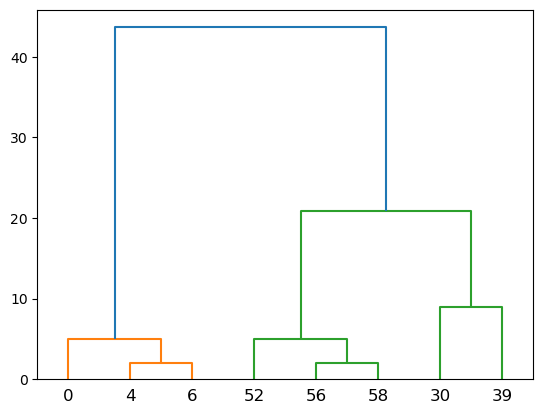

In [21]:
data = [0, 4, 6, 30, 39, 52, 56, 58]
Z = np.reshape(data, (len(data), 1))
dendrogram = sch.dendrogram(sch.linkage(Z, method='average'), labels=data)

In [22]:
airports = ['BOS', 'NY', 'CHI', 'DEN', 'SF', 'SEA']
distance = [[0, 206, 963, 1949, 3095, 2979],
            [206, 0, 802, 1771, 2934, 2815],
            [963, 802, 0, 966, 2142, 2013],
            [1949, 1771, 966, 0, 1235, 1307],
            [3095, 2934, 2142, 1235, 0, 808],
            [2979, 2815, 2013, 1307, 808, 0]]

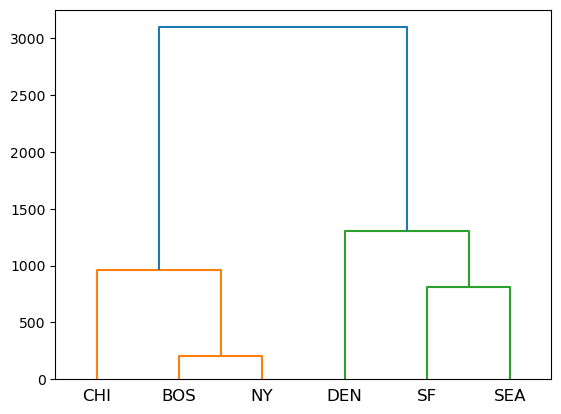

In [23]:
from scipy.spatial.distance import squareform
condensed_dist_matrix = squareform(distance)
dendrogram = sch.dendrogram(sch.linkage(condensed_dist_matrix, method='complete'), labels=airports)

**k-means clustering**
- k is the number of clusters that you want
- If you don't have any idea about how many clusters there are this can be problematic
- If you know how many clusters you want this is good choice as it is very fast

**k-means algorithm**
- Randomly choose k samples as initial centroids
- while True:
- create k clusters by assigning each point to the closest centroid
- compute k new centroids by averaging the examples in each cluster
- if centroids don't change we exit

- Complexity of one iteration
- Compare each point with each centroid k*n
- Typically this converages quite quickly
- Most commonly used clustering algorithm as it is very fast

**Choosing k**
- Choosing k wrong can be problematic
- If k is non-sensical then your clustering will be non-sensical
- How do we choose k?
- Results can depend on the initial centroids
- k-means is non deterministic
- If the initial centroid are poorly chosen can take longer to converge or we can get a completely different answer

**Choosing k**
- Choose k using a priori knowledge of the application
- For example there are only 5 different types of bacteria
- Two types of people in the world - DkIT graduates and not
- Try different values of k and evaluate the quality of the results
- Run hierarchical clustering on a subset of the data
- Try and select good initial centroidsdistributed over the space
- Try multiple set of randomly chosen centroids and choose the best result

**Mitigating dependence on initial centroids**
- Best = kmeans(points)
- for t in range(numTrials):
- C = kmeans(points)
- if dissimilarity(C) < dissimilarity(best)
- best = C
- return best

- Think of centroid as the "centre of gravity" of a cluster

**Elbow method to find k**
- $SSE_1 = \sum_{i=0}^n dist(x_i-c_1)^2$
- $SSE = SSE_1 + \dots + SSE_n$

In [24]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [25]:
df = pd.read_csv("income.csv")

In [26]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohen,29,61000
3,Ismail,28,60000
4,Kory,42,150000


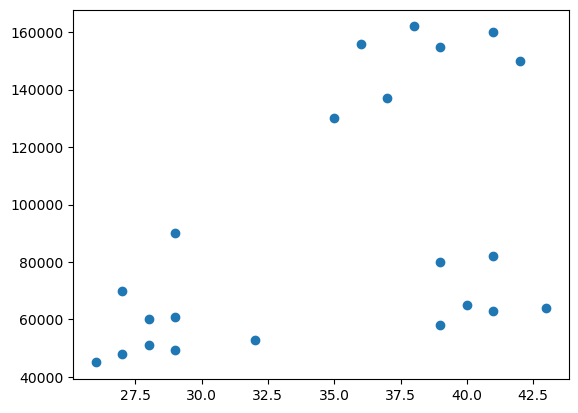

In [27]:
plt.scatter(df.Age, df.Income)

In [28]:
km = KMeans(n_clusters =3, n_init='auto')


In [29]:
km

KMeans(n_clusters=3)

In [30]:
y_predicted = km.fit_predict(df[['Age', 'Income']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [31]:
df['cluster'] = y_predicted
df

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohen,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Guatam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


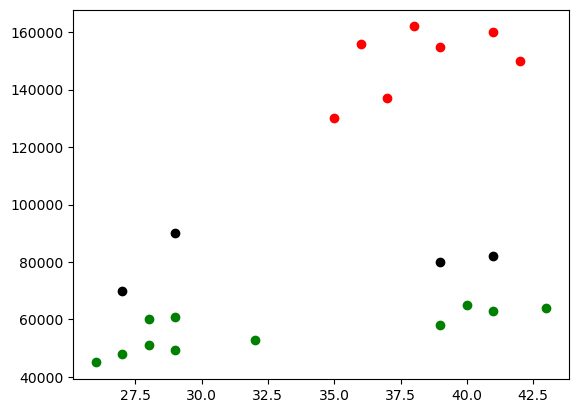

In [32]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age, df1.Income, color='green')
plt.scatter(df2.Age, df2.Income, color='red')
plt.scatter(df3.Age, df3.Income, color='black')

- Problematic as features are not scaled
- Income 40,000->165,000
- Age 25-45
- Income will completely dominate unless scaled. If you don't scale the data you might as well forget about age as the scale for income if 1000 times bigger

In [33]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df.Income = scaler.transform(df['Income'].values.reshape(-1, 1))

C:\Users\johnl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [34]:
df

,Name,Age,Income,cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohen,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Guatam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [35]:
scaler.fit(df[['Age']])
df.Age = scaler.transform(df['Age'].values.reshape(-1, 1))

C:\Users\johnl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [36]:
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohen,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Guatam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [37]:
km = KMeans(n_clusters =3, n_init='auto')
y_predicted = km.fit_predict(df[['Age', 'Income']])
df['cluster'] = y_predicted

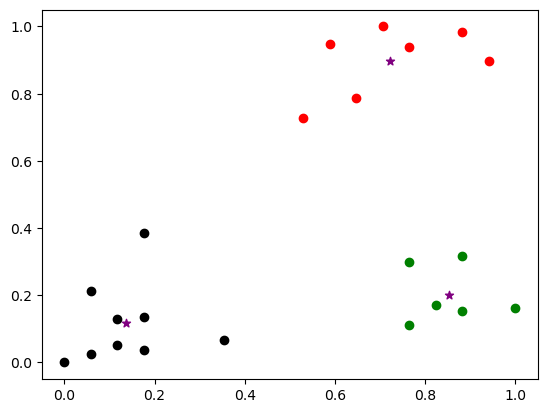

In [40]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age, df1.Income, color='green')
plt.scatter(df2.Age, df2.Income, color='red')
plt.scatter(df3.Age, df3.Income, color='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')

In [39]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

In [43]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df[['Age', 'Income']])
    sse.append(km.inertia_)

In [44]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.42015522057314425,
 0.36772458786920703,
 0.30882282525881155,
 0.2010168907516082,
 0.16661325260273888,
 0.10663983840905439]

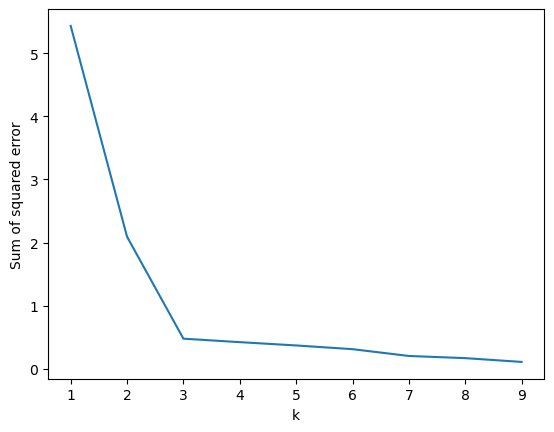

In [45]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)


**DBSCAN**
- Density Based Spatial Clustering of Applications with Noise
- Clusters are dense regions in the data space, separated by regions of lower density
- DBSCAN is based on this intuitive notion of "clusters" and "noise"
- The key idea is that for each point of a cluster, the neighbourhood of a given radius has to contain at least a given number of points
- Partitionining methods (k-means) and hierarchical clustering work for spherical shpaed or convex clusters. In other words, they are suitable for compact and well-separated clusters. They are severely impacted by the presence of noise or outliers
- Real life data can contain of arbitrary shape and can contain noise

**Parameters for DBSCAN**
- **$\epsilon$** It defines the neighbourhood around a data point. If the distance between two points is less than or equal to $\epsilon" then they are considered neighbours. If the $\epsilon$ value is chosen too small then a large part of the data will considered as outliers.
- **MinPts** Minimum number of neighbours (data points) within $\epsilon$ radius. The larger the dataset, the larger the value of MinPts should be. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value must be at least 3.

- In this algorithm there are 3 types of data points
- **Core Point**: A point is core point if it has at least MinPts with $\epsilon$
- **Border Point**: A point which has fewer than MinPts within eps but is in the neighbourhood of a core point
- **Noise or outlier**: A point that is not a core point or a border point

**Steps for DBSCAN Clustering Algorithm**
- Find all the points within $\epsilon$ and identify the core points with greater than or equal to MinPts neighbours
- For each core point if it is not already assigned to a cluster assign them to the same cluster as the core point
- Recursively find all connected points and assign to the same cluster as the core point.
- Iterate through the remaining points. Add border points.
- Points that don't belong to any cluster are noise

**Pseudo code for DBSCAN**
- DBSCAN(dataset, eps, MinPts)
- C = 1
- for each unvisited point p in the dataset
- mark p as visited
- find # neighbours for p
- neighbours N = find the neighbouring points of p
- if |N| >= MinPts
- Add p to C
- Add boundary points to C
- What is left are outliers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=0)

In [4]:
X


array([[ 1.03992529,  1.92991009],
       [-1.38609104,  7.48059603],
       [ 1.12538917,  4.96698028],
       [-1.05688956,  7.81833888],
       [ 1.4020041 ,  1.726729  ],
       [ 3.20722587,  0.36765575],
       [-1.76133611,  1.81716162],
       [ 1.34081536,  4.36827878],
       [-0.37881944,  8.33265721],
       [-0.80062564,  8.52294205],
       [-1.68146124,  2.80114893],
       [-2.43304923,  8.26748617],
       [ 1.19820169,  4.47062449],
       [-2.06457304,  7.05157615],
       [ 1.55515985,  0.12527811],
       [ 0.5408715 ,  4.0143625 ],
       [ 1.05374379,  4.49286859],
       [ 2.48368283,  0.57215086],
       [-1.14357242,  3.09602867],
       [-1.15330985,  2.32340978],
       [ 2.60509732,  1.22529553],
       [ 1.82346953,  1.1384044 ],
       [ 0.77468161,  4.91500986],
       [-1.91821859,  2.86268761],
       [-1.85305081,  2.65728761],
       [-0.30022483,  4.63059663],
       [ 1.7571105 ,  0.87138001],
       [ 0.65834704,  4.64200397],
       [-2.65468613,

In [5]:
y

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

In [70]:
db = DBSCAN(eps=0.8, min_samples=5).fit(X)

In [71]:
db.labels_

array([0, 1, 2, 1, 0, 0, 3, 2, 1, 1, 3, 1, 2, 1, 0, 2, 2, 0, 3, 3, 0, 0,
       2, 3, 3, 2, 0, 2, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 0, 2, 3, 2, 2,
       3, 3, 1, 3, 1, 0, 3, 0, 1, 0, 0, 3, 1, 3, 1, 0, 1, 2, 1, 3, 3, 3,
       1, 0, 1, 3, 2, 3, 1, 3, 3, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 3, 3, 2, 0, 0, 2, 3, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2,
       3, 3, 0, 1, 0, 2, 1, 0, 0, 2, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 1, 3,
       3, 0, 1, 3, 3, 1, 2, 1, 1, 3, 2, 3, 2, 3, 1, 2, 1, 1, 1, 2, 1, 2,
       0, 3, 1, 3, 0, 2, 1, 2, 2, 0, 2, 3, 3, 2, 0, 2, 2, 1, 0, 2, 3, 1,
       0, 0, 2, 3, 0, 2, 3, 3, 2, 2, 2, 2, 0, 1, 2, 3, 2, 2, 3, 3, 3, 2,
       3, 1, 2, 3, 0, 3, 2, 1, 3, 1, 2, 1, 2, 3, 2, 2, 1, 3, 3, 0, 0, 2,
       1, 0, 0, 3, 0, 3, 2, 1, 1, 2, 2, 1, 2, 0, 3, 2, 0, 3, 1, 3, 0, 2,
       0, 1, 1, 1, 1, 3, 3, 1, 2, 3, 0, 2, 3, 3, 3, 0, 0, 1, 2, 2, 3, 0,
       1, 3, 2, 1, 2, 0, 0, 3, 3, 2, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0,
       1, 3, 1, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 3], d

In [72]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

In [73]:
core_samples_mask[db.core_sample_indices_] = True

In [74]:
labels = db.labels_

In [75]:
# Numbers of clusters in the labels, ignoring noise if it is present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

In [76]:
n_clusters

4

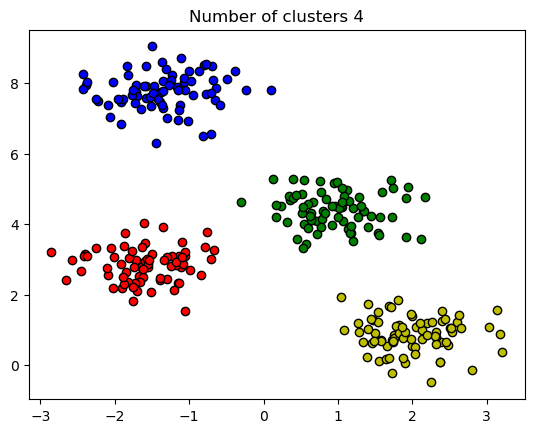

In [77]:
#Plot result
#Black to indicate noise
unique_labels = set(labels)
colours = ['y', 'b', 'g', 'r']
for k, col in zip(unique_labels, colours):
    if k == -1:
        # Black is the colour for noise
        col = 'k'

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:,0], xy[:, 1], 'x', markerfacecolor=col, markeredgecolor='k', markersize=6)
plt.title(f"Number of clusters {n_clusters}")
plt.show()

    
    

    

**Evaluation metrics for DBSCAN**
- Silhouette score is in the range from -1 to 1. A score of 1 indicates that the cluster is very compact. The worst value it -1. Values near zero indicate overlapping clusters.
- Absolute Rand Score is in the range from 0 to 1. More than 0.9 denotes an excellent cluster, above 0.8 is good. Less than 0.5 is poor.

In [80]:
sc = metrics.silhouette_score(X, labels)
sc

0.7356713838266389

In [82]:
from sklearn.metrics import adjusted_rand_score
ars = adjusted_rand_score(y, labels)
ars

1.0

**Difference between DBSCAN and k-means**
| DBSCAN | k-means|
|--|--|
|In DBSCAN we don't need to specify the number of clusters|k-means is very sensitive to the number of clusters so k needs to be specified|
|Clusters formed in DBSCAN can be any arbitrary shape|Clusters formed in k-means are spherical or convex in shape|
|DBSCAN can work well with datasets having noise and outliers|k-means does not work well with outliers. Outliers can skew the clusters in k-means massively|
|In DBSCAN two parameters are required for training the model|In k-means only one parameter is required for training the model|